<a href="https://colab.research.google.com/github/JigmeZangpo/DLP3310-0.33-inch-1080p-DLP-digital-micromirror-device-DMD-/blob/main/Journal_Prep_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.interpolate import griddata

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for CYLINDRICAL ROD data
max_file_path_cylinder = '/content/drive/My Drive/NIFS_Jigme/2025-2026/COMSOL simulation file/Er YAP new/01072025-sim results/cylinder/After discussion with Prof/Max cyn 1607.txt'
min_file_path_cylinder = '/content/drive/My Drive/NIFS_Jigme/2025-2026/COMSOL simulation file/Er YAP new/01072025-sim results/cylinder/After discussion with Prof/Min cyn 1607.txt'

# Function to load COMSOL data for CYLINDER
def load_comsol_data_cylinder(filepath):
    # Skip header lines starting with %
    data = pd.read_csv(filepath, comment='%', delim_whitespace=True,
                      names=['radius', 'P_abs', 'w0', 'l', 'temperature'])
    # Clean floating-point precision
    data['w0'] = data['w0'].round(2)
    data['radius'] = data['radius'].round(2)
    data['l'] = data['l'].round(2)
    return data

# Load CYLINDRICAL ROD data
max_data_cylinder = load_comsol_data_cylinder(max_file_path_cylinder)
min_data_cylinder = load_comsol_data_cylinder(min_file_path_cylinder)

# Merge the data
merged_data_cylinder = pd.merge(
    max_data_cylinder,
    min_data_cylinder,
    on=['radius', 'P_abs', 'w0', 'l'],
    suffixes=('_max', '_min')
)

# Calculate delta T
merged_data_cylinder['delta_T'] = merged_data_cylinder['temperature_max'] - merged_data_cylinder['temperature_min']

# Find the minimum delta T configuration for CYLINDRICAL ROD
min_delta_row_cylinder = merged_data_cylinder.loc[merged_data_cylinder['delta_T'].idxmin()]
print("Minimum Delta T Configuration for CYLINDRICAL ROD:")
print(min_delta_row_cylinder[['radius', 'P_abs', 'w0', 'l', 'delta_T']].to_string(index=False))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Minimum Delta T Configuration for CYLINDRICAL ROD:
  0.25
 20.00
300.00
 32.00
 13.83


/tmp/ipython-input-45-49443055.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, comment='%', delim_whitespace=True,
/tmp/ipython-input-45-49443055.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, comment='%', delim_whitespace=True,


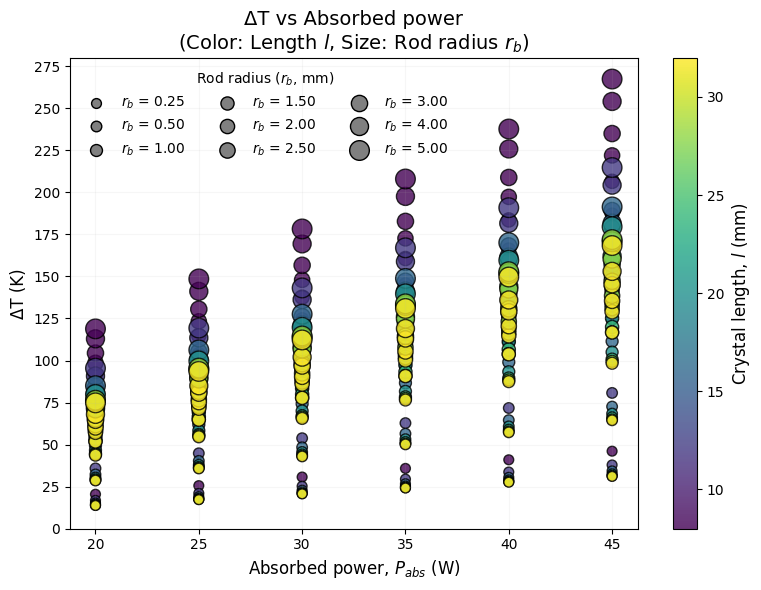

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for fixed beam waist ω = 300 µm
omega_fixed = 300
filtered_cylinder = merged_data_cylinder[merged_data_cylinder['w0'] == omega_fixed]

# Normalize radius for marker size
r_min = filtered_cylinder['radius'].min()
r_max = filtered_cylinder['radius'].max()
r_norm = (filtered_cylinder['radius'] - r_min) / (r_max - r_min)
size_scaled_cylinder = 50 + 150 * r_norm  # Adjust size range if needed

# Start plot
plt.figure(figsize=(8, 6))
scatter_cyl = plt.scatter(
    filtered_cylinder['P_abs'],
    filtered_cylinder['delta_T'],
    c=filtered_cylinder['l'],               # Color by crystal length l
    s=size_scaled_cylinder,                # Size by radius
    cmap='viridis',
    alpha=0.8,
    edgecolors='k'
)

# Colorbar for length l
cbar_cyl = plt.colorbar(scatter_cyl)
cbar_cyl.set_label('Crystal length, $l$ (mm)', fontsize=12)

# Generate dynamic legend for radius values (r_b)
unique_r = np.sort(filtered_cylinder['radius'].unique())

legend_handles_cyl = []
for r in unique_r:
    norm_val = (r - r_min) / (r_max - r_min)
    size = 50 + 150 * norm_val
    handle = plt.scatter([], [], s=size, edgecolors='k', facecolors='gray', label=f'$r_b$ = {r:.2f}')
    legend_handles_cyl.append(handle)

# Add legend without frame
plt.legend(handles=legend_handles_cyl, title='Rod radius ($r_b$, mm)', frameon=False, ncol=3, loc='best')

# Axis labels and title
plt.xlabel('Absorbed power, $P_{abs}$ (W)', fontsize=12)
plt.ylabel('ΔT (K)', fontsize=12)
plt.title('ΔT vs Absorbed power\n(Color: Length $l$, Size: Rod radius $r_b$)', fontsize=14)

# Custom y-axis ticks every 25 K
plt.yticks(np.arange(0, filtered_cylinder['delta_T'].max() + 25, 25))

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()


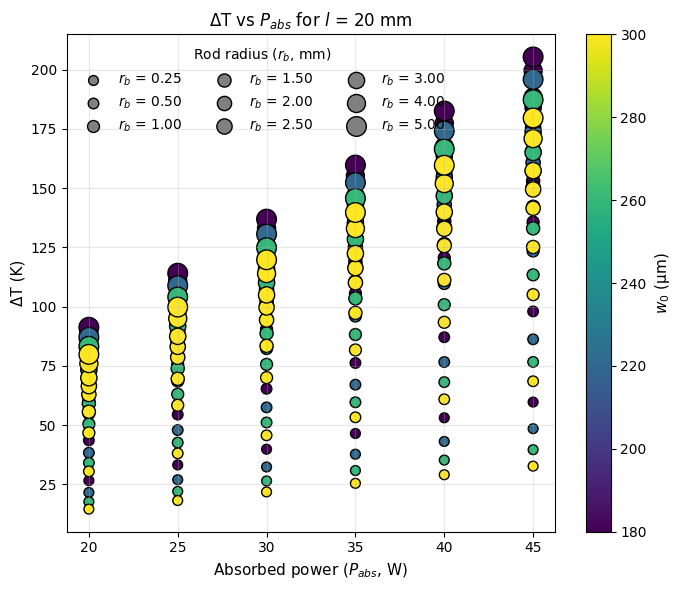

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data where l = 20 mm
filtered_20 = merged_data_cylinder[merged_data_cylinder['l'] == 20].copy()

# Round for cleaner legend labels
filtered_20['radius'] = filtered_20['radius'].round(2)
filtered_20['w0'] = filtered_20['w0'].round(1)

# Normalize marker sizes based on radius
r_min, r_max = filtered_20['radius'].min(), filtered_20['radius'].max()

def normalize_size(r):
    return 50 + 150 * (r - r_min) / (r_max - r_min)

# Create scatter plot
plt.figure(figsize=(7, 6))
sc = plt.scatter(filtered_20['P_abs'], filtered_20['delta_T'],
                 c=filtered_20['w0'],
                 s=normalize_size(filtered_20['radius']),
                 cmap='viridis',
                 edgecolors='black')

# Labels and grid
plt.title('ΔT vs $P_{abs}$ for $l$ = 20 mm', fontsize=12)
plt.xlabel('Absorbed power ($P_{abs}$, W)', fontsize=11)
plt.ylabel('ΔT (K)', fontsize=11)
plt.grid(True, alpha=0.3)

# Colorbar for w0
cbar = plt.colorbar(sc)
cbar.set_label('$w_0$ (μm)', fontsize=11)

# Radius (r_b) marker size legend
for r in sorted(filtered_20['radius'].unique()):
    plt.scatter([], [], s=normalize_size(r), edgecolors='k', facecolors='gray',
                label=f'$r_b$ = {r:.2f} mm')
plt.legend(handles=legend_handles_cyl, title='Rod radius ($r_b$, mm)', frameon=False, ncol=3, loc='best')

plt.tight_layout()
plt.show()


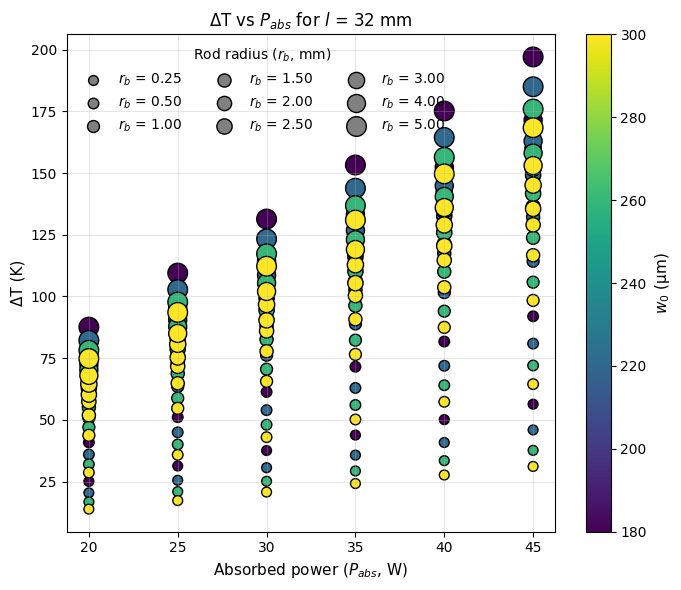

In [28]:
# Filter data where l = 32 mm
filtered_32 = merged_data_cylinder[merged_data_cylinder['l'] == 32].copy()

# Round for cleaner legend labels
filtered_32['radius'] = filtered_32['radius'].round(2)
filtered_32['w0'] = filtered_32['w0'].round(1)

# Normalize marker sizes based on radius
r_min_32, r_max_32 = filtered_32['radius'].min(), filtered_32['radius'].max()

def normalize_size_32(r):
    return 50 + 150 * (r - r_min_32) / (r_max_32 - r_min_32)

# Create scatter plot
plt.figure(figsize=(7, 6))
sc = plt.scatter(filtered_32['P_abs'], filtered_32['delta_T'],
                 c=filtered_32['w0'],
                 s=normalize_size_32(filtered_32['radius']),
                 cmap='viridis',
                 edgecolors='black')

# Labels and grid
plt.title('ΔT vs $P_{abs}$ for $l$ = 32 mm', fontsize=12)
plt.xlabel('Absorbed power ($P_{abs}$, W)', fontsize=11)
plt.ylabel('ΔT (K)', fontsize=11)
plt.grid(True, alpha=0.3)

# Colorbar for w0
cbar = plt.colorbar(sc)
cbar.set_label('$w_0$ (μm)', fontsize=11)

# Radius (r_b) marker size legend
for r in sorted(filtered_32['radius'].unique()):
    plt.scatter([], [], s=normalize_size_32(r), edgecolors='k', facecolors='gray',
                label=f'$r_b$ = {r:.2f} mm')
plt.legend(handles=legend_handles_cyl, title='Rod radius ($r_b$, mm)', frameon=False, ncol=3, loc='best')

plt.tight_layout()
plt.show()


In [29]:
# Define target values
target_power = 45
target_w0 = 300
target_radius = 0.25

# Filter for l = 20 mm
filtered_l20 = merged_data_cylinder[
    (merged_data_cylinder['P_abs'] == target_power) &
    (merged_data_cylinder['w0'] == target_w0) &
    (merged_data_cylinder['radius'] == target_radius) &
    (merged_data_cylinder['l'] == 20)
]

# Filter for l = 32 mm
filtered_l32 = merged_data_cylinder[
    (merged_data_cylinder['P_abs'] == target_power) &
    (merged_data_cylinder['w0'] == target_w0) &
    (merged_data_cylinder['radius'] == target_radius) &
    (merged_data_cylinder['l'] == 32)
]

# Show results
print("ΔT for l = 20 mm:")
print(filtered_l20[['radius', 'P_abs', 'w0', 'l', 'delta_T']].to_string(index=False))

print("\nΔT for l = 32 mm:")
print(filtered_l32[['radius', 'P_abs', 'w0', 'l', 'delta_T']].to_string(index=False))


ΔT for l = 20 mm:
 radius  P_abs     w0  l  delta_T
   0.25     45 300.00 20    32.64

ΔT for l = 32 mm:
 radius  P_abs     w0  l  delta_T
   0.25     45 300.00 32    31.11


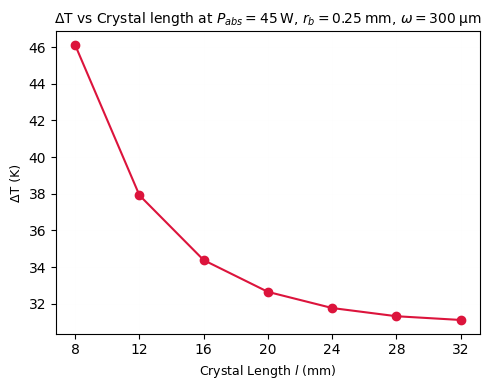

In [41]:
import matplotlib.pyplot as plt

# Define fixed values
target_power = 45
target_w0 = 300
target_radius = 0.25

# Filter data
filtered_data = merged_data_cylinder[
    (merged_data_cylinder['P_abs'] == target_power) &
    (merged_data_cylinder['w0'] == target_w0) &
    (merged_data_cylinder['radius'] == target_radius)
].sort_values(by='l')

# Plot
plt.figure(figsize=(5, 4))
plt.plot(filtered_data['l'], filtered_data['delta_T'], marker='o', linestyle='-', color='crimson')

plt.title('ΔT vs Crystal length at $P_{abs}=45$ W, $r_b=0.25$ mm, $ω=300$ μm', fontsize=10)
plt.xlabel('Crystal Length $l$ (mm)', fontsize=9)
plt.ylabel('ΔT (K)', fontsize=9)
plt.grid(True, alpha=0.01)
plt.xticks(filtered_data['l'].unique())  # Ensure discrete ticks
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for SQUARE ROD data
max_file_path_square = '/content/drive/My Drive/NIFS_Jigme/2025-2026/COMSOL simulation file/Er YAP new/01072025-sim results/square/After discussion with Prof/Max square 1607.txt'
min_file_path_square = '/content/drive/My Drive/NIFS_Jigme/2025-2026/COMSOL simulation file/Er YAP new/01072025-sim results/square/After discussion with Prof/Min square 1607.txt'

# Function to load COMSOL data for SQUARE ROD
def load_comsol_data_square(filepath):
    data = pd.read_csv(filepath, comment='%', delim_whitespace=True,
                      names=['w2', 'P_abs', 'l', 'w0', 'temperature'])
    data['w2'] = data['w2'].round(2)
    data['P_abs'] = data['P_abs'].round(2)
    data['l'] = data['l'].round(2)
    data['w0'] = data['w0'].round(2)
    return data

# Load square rod data
max_data_square = load_comsol_data_square(max_file_path_square)
min_data_square = load_comsol_data_square(min_file_path_square)

# Merge the data on all matching parameters
merged_data_square = pd.merge(
    max_data_square,
    min_data_square,
    on=['w2', 'P_abs', 'l', 'w0'],
    suffixes=('_max', '_min')
)

# Calculate delta T
merged_data_square['delta_T'] = merged_data_square['temperature_max'] - merged_data_square['temperature_min']



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-46-2529698296.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, comment='%', delim_whitespace=True,
/tmp/ipython-input-46-2529698296.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, comment='%', delim_whitespace=True,


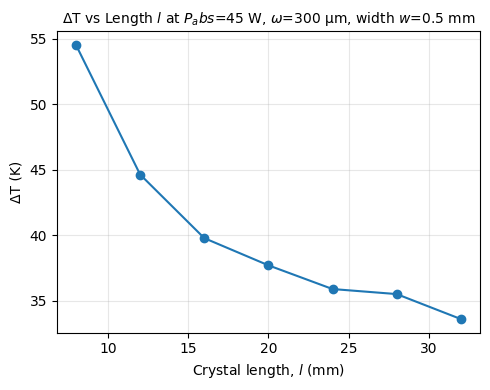

In [61]:
import matplotlib.pyplot as plt

# Filter data for the fixed parameters
target_power = 45
target_w0 = 300
target_width = 0.5

filtered_data = merged_data_square[
    (merged_data_square['P_abs'] == target_power) &
    (merged_data_square['w0'] == target_w0) &
    (merged_data_square['w2'] == target_width)
]

# Sort by 'l' for a nice curve
filtered_data = filtered_data.sort_values('l')

# Plot ΔT vs l
plt.figure(figsize=(5,4))
plt.plot(filtered_data['l'], filtered_data['delta_T'], marker='o', linestyle='-')

plt.xlabel('Crystal length, $l$ (mm)', fontsize=10)
plt.ylabel('ΔT (K)', fontsize=10)
plt.title(f'ΔT vs Length $l$ at $P_abs$={target_power} W, $\omega$={target_w0} µm, width $w$={target_width} mm', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for RECTANGULAR ROD data
max_file_path_rect = '/content/drive/My Drive/NIFS_Jigme/2025-2026/COMSOL simulation file/Er YAP new/01072025-sim results/Rectangle/After discussion with Prof/Max rect 1607.txt'
min_file_path_rect = '/content/drive/My Drive/NIFS_Jigme/2025-2026/COMSOL simulation file/Er YAP new/01072025-sim results/Rectangle/After discussion with Prof/Min rect 1607.txt'

# Function to load COMSOL data for RECTANGULAR ROD
def load_comsol_data_rect(filepath):
    data = pd.read_csv(filepath, comment='%', delim_whitespace=True,
                      names=['w4', 'w3', 'P_abs', 'l', 'w0', 'temperature'])
    data['w4'] = data['w4'].round(2)
    data['w3'] = data['w3'].round(2)
    data['P_abs'] = data['P_abs'].round(2)
    data['l'] = data['l'].round(2)
    data['w0'] = data['w0'].round(2)
    return data

# Load rectangular rod data
max_data_rect = load_comsol_data_rect(max_file_path_rect)
min_data_rect = load_comsol_data_rect(min_file_path_rect)

# Merge the data on all matching parameters
merged_data_rect = pd.merge(
    max_data_rect,
    min_data_rect,
    on=['w4', 'w3', 'P_abs', 'l', 'w0'],
    suffixes=('_max', '_min')
)

# Calculate delta T
merged_data_rect['delta_T'] = merged_data_rect['temperature_max'] - merged_data_rect['temperature_min']

# Show minimum delta_T configuration (optional)
min_delta_row_rect = merged_data_rect.loc[merged_data_rect['delta_T'].idxmin()]
print("Minimum Delta T Configuration for RECTANGULAR ROD:")
print(min_delta_row_rect[['w4', 'w3', 'P_abs', 'l', 'w0', 'delta_T']].to_string(index=False))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-54-1675200016.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, comment='%', delim_whitespace=True,
/tmp/ipython-input-54-1675200016.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, comment='%', delim_whitespace=True,


Minimum Delta T Configuration for RECTANGULAR ROD:
 12.00
  0.50
 20.00
 32.00
300.00
 18.80


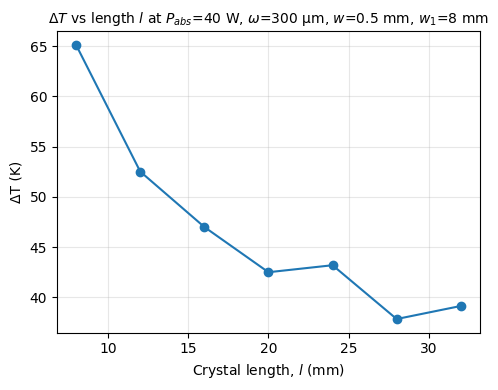

In [60]:
import matplotlib.pyplot as plt

# Fixed parameters
target_power = 40
target_w0 = 300
target_w3 = 0.5  # w
target_w4 = 8    # w1

# Filter data
filtered_rect = merged_data_rect[
    (merged_data_rect['P_abs'] == target_power) &
    (merged_data_rect['w0'] == target_w0) &
    (merged_data_rect['w3'] == target_w3) &
    (merged_data_rect['w4'] == target_w4)
]

# Sort by length for smooth plotting
filtered_rect = filtered_rect.sort_values('l')

# Plot ΔT vs l
plt.figure(figsize=(5,4))
plt.plot(filtered_rect['l'], filtered_rect['delta_T'], marker='o', linestyle='-')

plt.xlabel('Crystal length, $l$ (mm)', fontsize=10)
plt.ylabel('ΔT (K)', fontsize=10)
plt.title(
    rf'$\Delta T$ vs length $l$ at $P_{{abs}}$={target_power} W, $\omega$={target_w0} µm, $w$={target_w3} mm, $w_1$={target_w4} mm',
    fontsize=10
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
